#### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading the dataset

In [ ]:
df = pd.read_csv('C:/Users/appcloud/Documents/My Tableau Repository/Datasources/Data sets/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


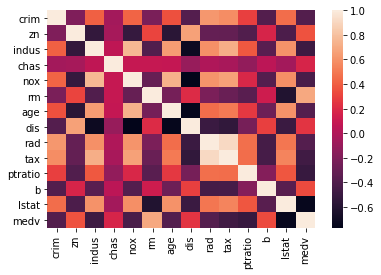

In [ ]:
corr = df.corr()
sns.heatmap(corr)

In [ ]:
x = df.drop('medv',axis=1)
y = df['medv']

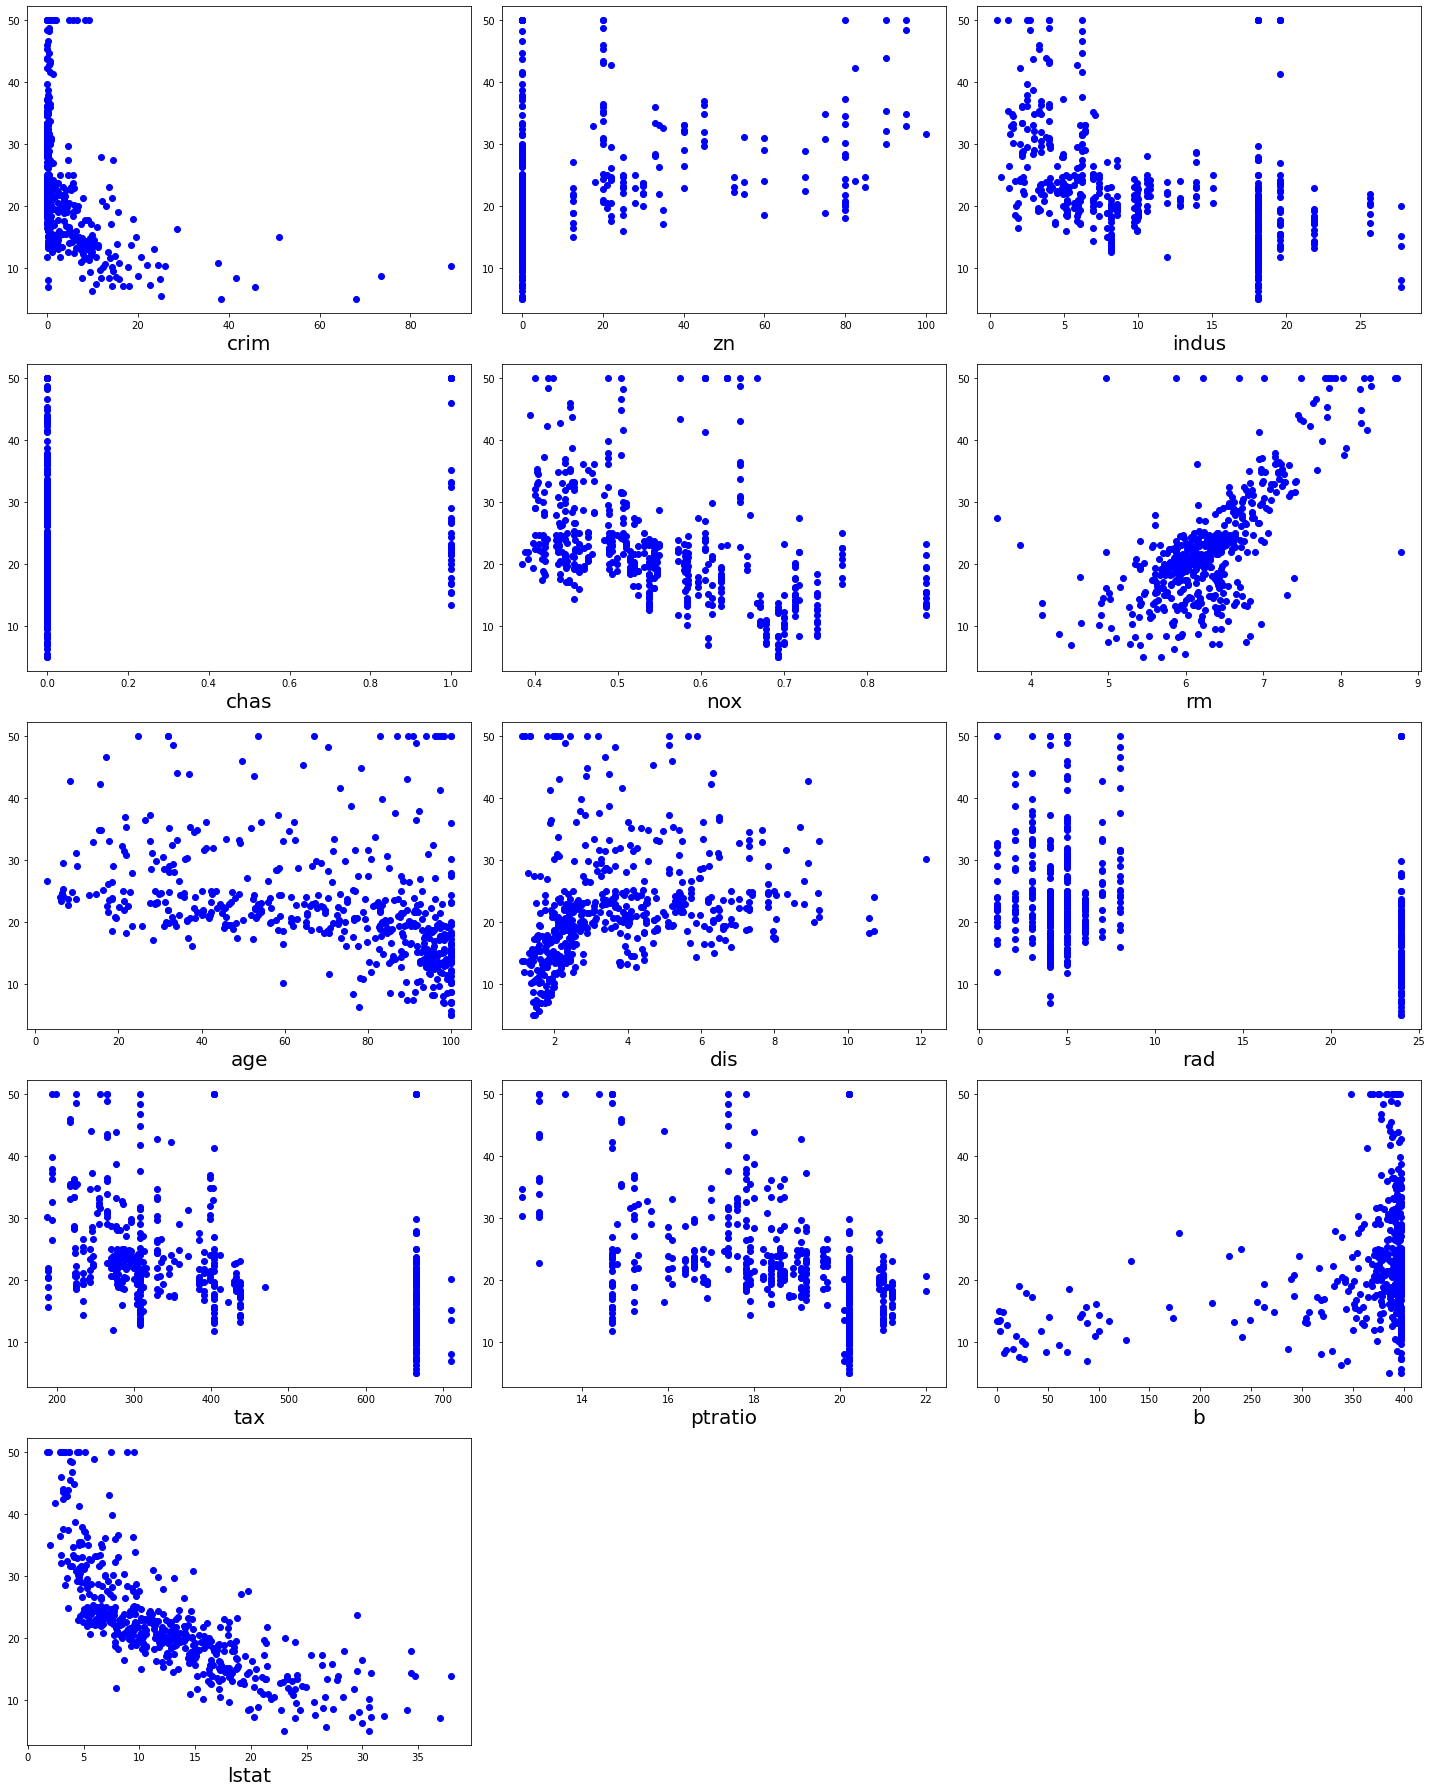

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in x:
    ax = plt.subplot(5,3,plotnumber)
    plt.scatter(x[column],y,color='blue')
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### Observations

1. rm has great linear relationship with medv, Lets use this features for linear regression Model
2. lstat has linear realtionship but in negative linear relation

In [ ]:
X = df[['lstat','rm']]

#### Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-1.0755623 ,  0.41367189],
       [-0.49243937,  0.19427445],
       [-1.2087274 ,  1.28271368],
       ...,
       [-0.98304761,  0.98496002],
       [-0.86530163,  0.72567214],
       [-0.66905833, -0.36276709]])

#### Splitting training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size =0.2,random_state =1)

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
reg.coef_

array([-4.70350399,  3.18600482])

In [ ]:
reg.intercept_

22.676912543139494

#### Model Evaluation

##### R2 Score

In [ ]:
reg.score(x_train,y_train)

0.6251836356449056

In [ ]:
reg.score(x_test,y_test)

0.6753556251471675

In [ ]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

###### Adjusted R2 Score

In [ ]:
adj_r2(x_train,y_train)

0.6233142273438828

In [ ]:
adj_r2(x_test,y_test)

0.6687971529279184

##### Lasso Regularization

In [ ]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV

lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [ ]:
alpha = lasscv.alpha_

In [ ]:
alpha

0.0004086664636996341

In [ ]:
Lasso_reg = Lasso(alpha)
Lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0004086664636996341)

In [ ]:
Lasso_reg.score(x_train,y_train)

0.6251836334861838

In [ ]:
Lasso_reg.score(x_test,y_test)

0.6753420089831792

almost similar to R2 Score

##### ElasticNet CV

In [ ]:
elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [ ]:
elasticCV.score(x_train,y_train)

0.6249640137266428

In [ ]:
elasticCV.score(x_test,y_test)

0.6728732418276443